## Problem Statement

The terms “overweight” and “obesity” refer to body weight that is greater than what is considered normal or healthy for a certain height. Overweight is generally due to extra body fat. However, overweight may also be due to extra muscle, bone, or water. This would impact the health and there are many other diseases caused by extra body fat. We would be creating a model to predict the body fat based on some parameters. We would like to determine whether the person is obese or not in this project.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,accuracy_score
from sklearn.metrics import auc,make_scorer,precision_recall_curve,log_loss
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PowerTransformer, Normalizer
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis
from tqdm import tqdm

In [2]:
# Load data into a dataframe
bodyfat_df = pd.read_csv("bodyfat.csv")
bodyfat_df.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


#### EDA and Outlier Detection

In [3]:
# Check the dimension of the table
print("The dimension of the table is: ", bodyfat_df.shape)

# What type of variables are in the table 
print("Describe Data")
print(bodyfat_df.describe())

The dimension of the table is:  (252, 15)
Describe Data
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.40595

In [4]:
# Check if any missing values
np.sum(np.sum(bodyfat_df.isna()))

0

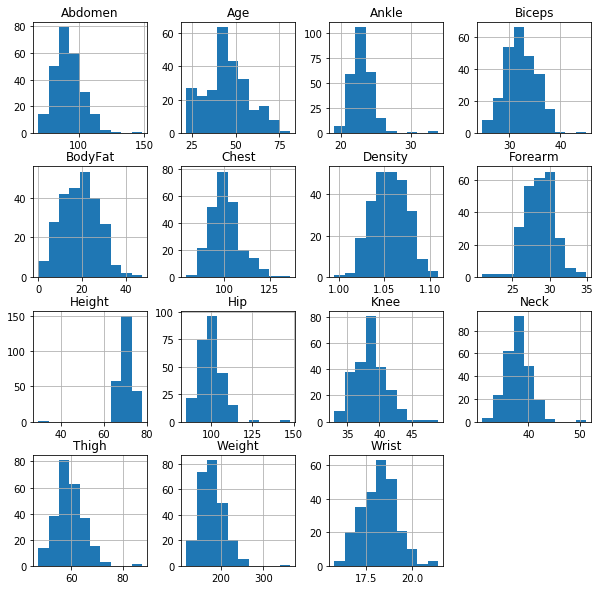

In [5]:
bodyfat_df.hist(figsize=(10,10))
plt.show()

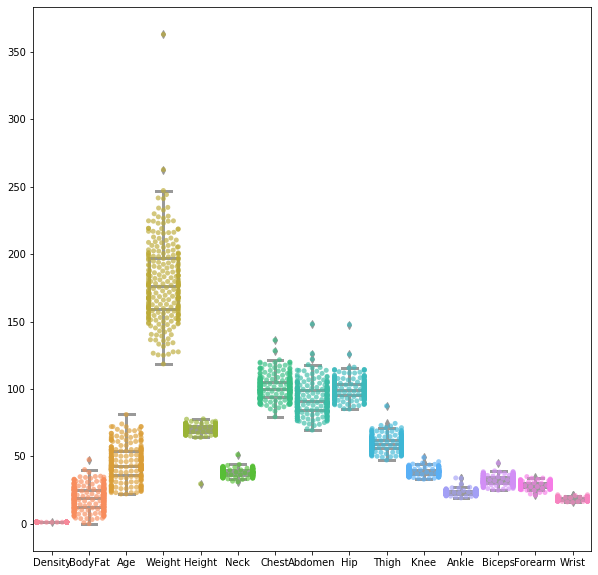

In [6]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
sns.boxplot(data=bodyfat_df,color="white",linewidth=3)
sns.swarmplot(data=bodyfat_df,s=5,alpha=0.65)
plt.show()

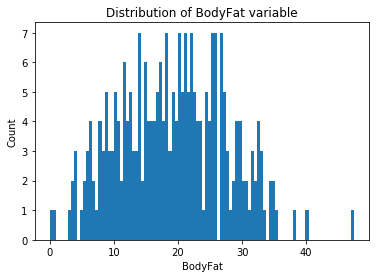

In [7]:
# Plot histogram to identify any outlier that is visual to eye
plt.hist(bodyfat_df['BodyFat'], bins=100)
plt.ylabel('Count')
plt.xlabel('BodyFat')
plt.title('Distribution of BodyFat variable');

The values of 0 and 0.7 are not possible to achieve and we can delete them.

In [8]:
bodyfat_df.loc[bodyfat_df['BodyFat'] < 1]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
171,1.0983,0.7,35,125.75,65.5,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
181,1.1089,0.0,40,118.50,68.0,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [9]:
bodyfat_df1 = bodyfat_df.drop(bodyfat_df[bodyfat_df['BodyFat'] < 1].index)

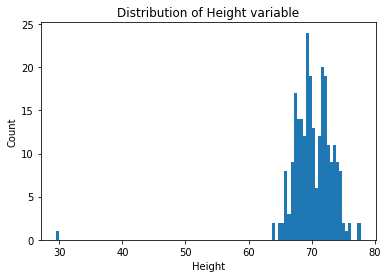

In [10]:
# Plot histogram to identify any outlier that is visual to eye
plt.hist(bodyfat_df['Height'], bins=100)
plt.ylabel('Count')
plt.xlabel('Height')
plt.title('Distribution of Height variable');

In [11]:
bodyfat_df1.loc[bodyfat_df1['Height'] < 35]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
41,1.025,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


It looks like an outlier in the dataset, so I will delete this observation as well.

In [12]:
bodyfat_df1 = bodyfat_df1.drop(bodyfat_df1.loc[bodyfat_df1['Height'] < 35].index)

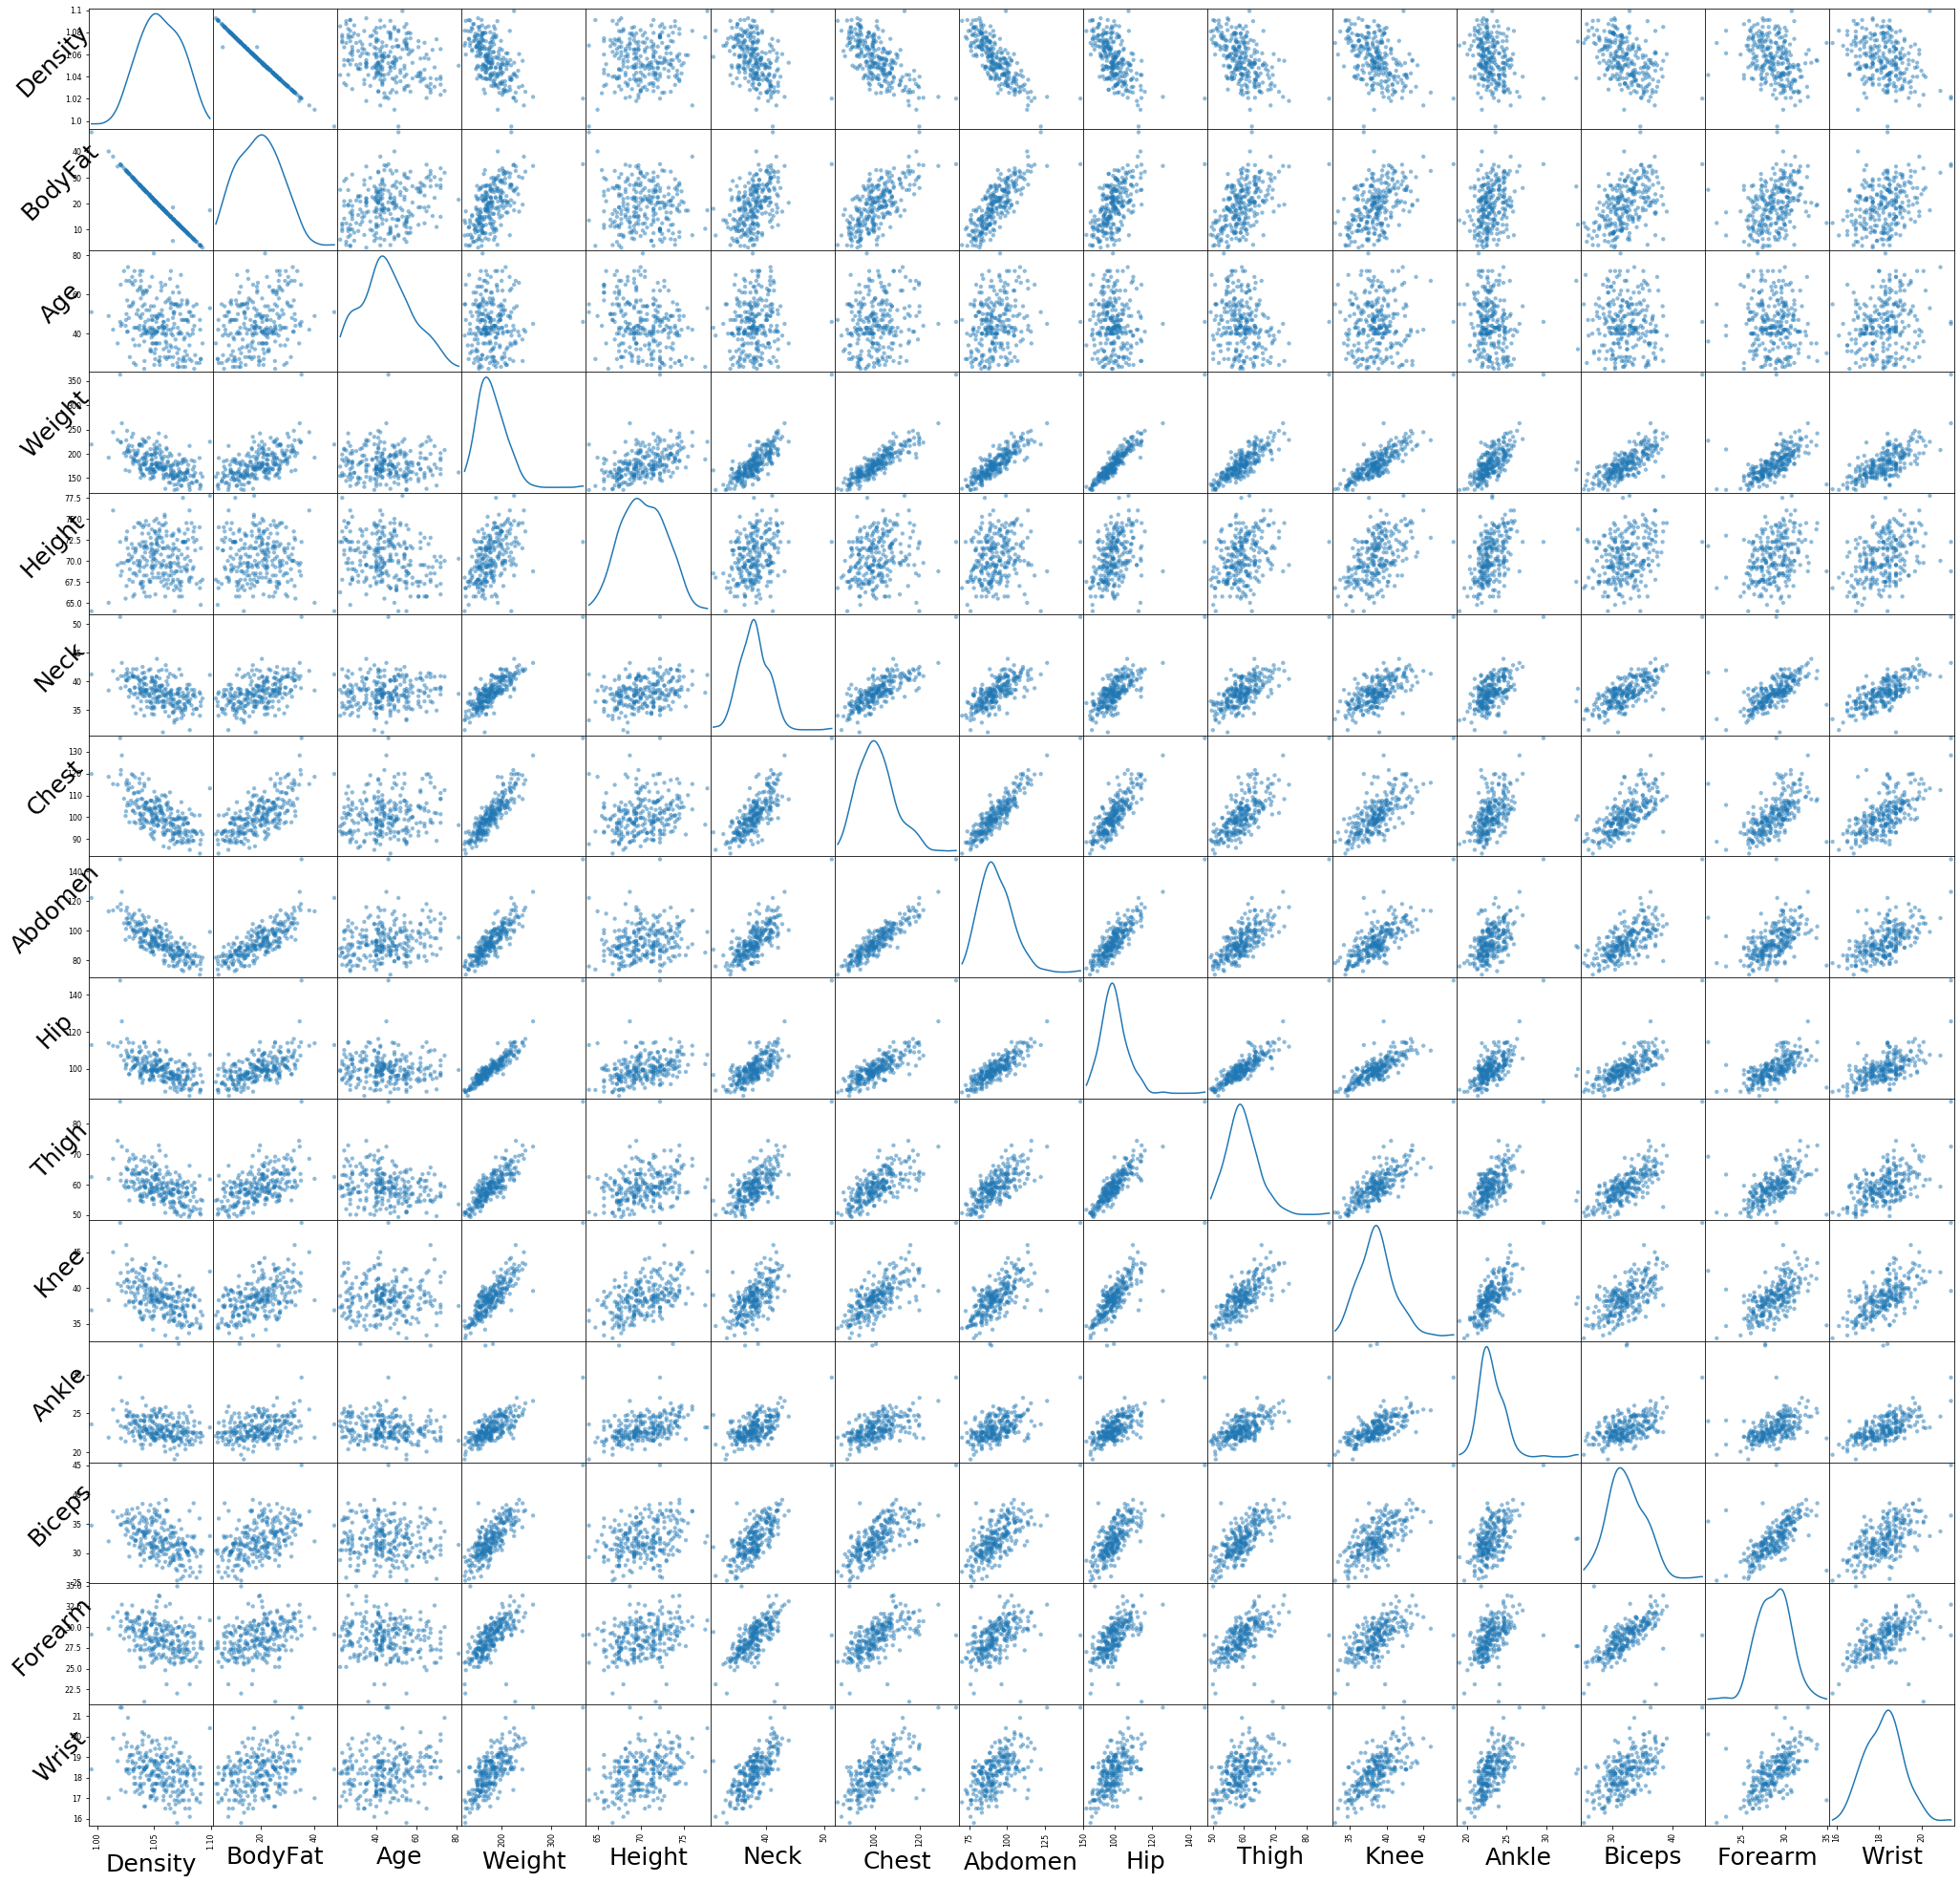

In [13]:
# Scatter plot of the variables
axes = pd.plotting.scatter_matrix(bodyfat_df1, figsize=(35, 35), s=75, diagonal='kde')
for ax in axes.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize=25, rotation=45)
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)

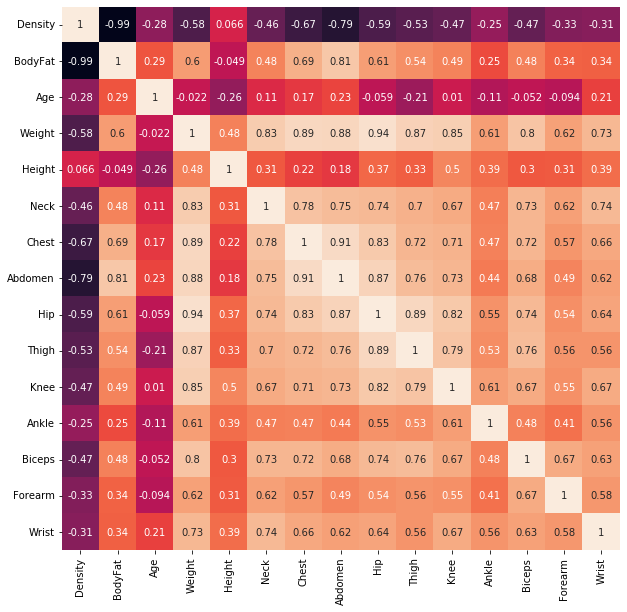

In [14]:
# Correlation of the variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(bodyfat_df1.corr(),annot=True,cbar=False,ax=ax)
plt.show()

Based on the scatter plot and the correlation heatmap it looks like there is a perferct linear relationship between Density and BodfFat variable. Since fat percentage and body density are synonymous, I will drop density and use only the circumference measurements to predict body fat percentage.

Also age doesnt determine the body fat of a person, so will drop Age variable also from the dataset

In [15]:
y = bodyfat_df1['BodyFat']
x = bodyfat_df1.drop(columns=['BodyFat','Density','Age'])
print(x)

     Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  Biceps  \
0    154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   21.9    32.0   
1    173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   23.4    30.5   
2    154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   24.0    28.8   
3    184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   22.8    32.4   
4    184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   24.0    32.2   
..      ...     ...   ...    ...      ...    ...    ...   ...    ...     ...   
247  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   21.5    25.6   
248  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   23.2    35.2   
249  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   21.5    31.3   
250  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   22.7    30.5   
251  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   24.6    33.7   

     Forearm  Wrist  
0       27.4   17

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
# Details of training dataset
print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of x_train dataset:  (199, 12)
Shape of y_train dataset:  (199,)
Shape of x_test dataset:  (50, 12)
Shape of y_test dataset:  (50,)


In [18]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=10)
skbest.fit(x_train,y_train)
x_train_skbest=skbest.transform(x_train)
x_test_skbest=skbest.transform(x_test)
x_train_skbest.shape

(199, 10)

In [19]:
# 10 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print 10 best features

   Feature_Name     Score
4       Abdomen  3.809316
3         Chest  2.662361
5           Hip  2.475324
0        Weight  2.117462
2          Neck  1.948599
6         Thigh  1.768280
9        Biceps  1.545362
7          Knee  1.457433
1        Height  1.193745
11        Wrist  1.139133


Looks like Abdomen, Chest, Hip and Weight plays a major part when compared to the other features

#### Model Evaluation

In [20]:
def get_model_score(pipe, data_x, data_y, cv=5):
    cv_score = cross_val_score(pipe, data_x, data_y, cv=cv)
    return np.mean(cv_score), np.std(cv_score)

def get_pipeline(*additional_pipe_steps, model):
    pipe_steps = [PowerTransformer(method='box-cox'), Normalizer(norm='l2')]
    pipe_steps.extend(additional_pipe_steps)
    return make_pipeline(*pipe_steps,
                         TransformedTargetRegressor(regressor=model, 
                                                    transformer=PowerTransformer(method='box-cox')))


In [21]:
def evaluate_model(pipe, X, y):
    y_pred, y_true = np.empty(len(y)), np.empty(len(y))
    loo = LeaveOneOut()
    for i, (train_idx, test_idx) in tqdm(enumerate(loo.split(X)), total=len(y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        y_pred[i] = pipe.fit(X_train, y_train).predict(X_test)[0]
        y_true[i] = y_test
    return r2_score(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

In [22]:
pipe = get_pipeline(PCA(n_components=6), model=LinearRegression())
model_score, score_std = get_model_score(pipe=pipe, data_x=x, data_y=y, cv=5)
r2, rmse = evaluate_model(pipe, x, y)
print('Linear Regression Model Score: ', model_score)
print('Linear Regression SD Score: ',score_std)
print('R Square: ', r2)
print('Root Mean Sqaure: ', rmse)

100%|██████████| 249/249 [00:10<00:00, 24.40it/s]

Linear Regression Model Score:  0.4760618237463552
Linear Regression SD Score:  0.2588001654989154
R Square:  0.5842677076011253
Root Mean Sqaure:  5.277296230935636


In [23]:
pipe = get_pipeline(PCA(n_components=6), model=RandomForestRegressor())
model_score, score_std = get_model_score(pipe=pipe, data_x=x, data_y=y, cv=5)
r2, rmse = evaluate_model(pipe, x, y)
print('Random Forest Regressor Model Score: ',model_score)
print('Random Forest Regressor SD Score: ',score_std)
print('R Square: ', r2)
print('Root Mean Sqaure: ', rmse)

100%|██████████| 249/249 [01:13<00:00,  3.40it/s]

Random Forest Regressor Model Score:  0.4713688065398777
Random Forest Regressor SD Score:  0.22240534030226908
R Square:  0.5808876913007635
Root Mean Sqaure:  5.298705727658999


Linear Regression is providing a better accuracy when compared with Random Forest. So, I would like to choose Linear Regression model in calcualting the BodyFat for a provided data

In [24]:
def predict_loo(model, X, y):
    y_pred, y_true = np.empty(len(y)), np.empty(len(y))
    loo = LeaveOneOut()
    for i, (train_idx, test_idx) in tqdm(enumerate(loo.split(X)), total=len(y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        y_pred[i] = model.fit(X_train, y_train).predict(X_test)[0]
        y_true[i] = y_test
    return y_pred, y_true

In [25]:
final_model = get_pipeline(model=LinearRegression())
y_pred, y_true = predict_loo(final_model, x, y)

100%|██████████| 249/249 [00:09<00:00, 26.54it/s]


These are some random measurements which would be given as input to provide the bodyfat of a person

In [26]:
measurements = np.array([165, 180, 38.5, 102.5, 90, 55.2, 38.3, 26.3, 32.5, 29.4, 17.2, 12.3]).reshape(1, -1)

In [27]:
prediction = final_model.predict(measurements)[0]
print(f'The prediction for body fat percent is {prediction:.1f}%.')

The prediction for body fat percent is 17.3%.
